In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [45]:
#Extract Filenames from Folder

In [3]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [4]:
len(filenames)

44441

In [5]:
#Importing ResNet50 Model and Cofiguration

In [6]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 162s 2us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
#Extracting Fetaures from Image

In [8]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

FileNotFoundError: [Errno 2] No such file or directory: '16871.jpg'

In [10]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [53]:
extract_features_from_images(filenames[0], model)

1/1 [==============================] - 0s 75ms/step


array([0.        , 0.01761619, 0.00171596, ..., 0.01247231, 0.02726381,
       0.06899218], dtype=float32)

In [11]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━

[array([0.        , 0.01761625, 0.001716  , ..., 0.0124723 , 0.02726394,
        0.0689925 ], dtype=float32),
 array([0.        , 0.03648944, 0.        , ..., 0.00997931, 0.0237553 ,
        0.04649903], dtype=float32),
 array([0.        , 0.03642139, 0.00710439, ..., 0.00140779, 0.        ,
        0.05435034], dtype=float32),
 array([0.00232171, 0.05030547, 0.00747744, ..., 0.00346683, 0.03391019,
        0.04565724], dtype=float32),
 array([0.00306834, 0.06240455, 0.        , ..., 0.00170627, 0.02032891,
        0.05833261], dtype=float32),
 array([0.        , 0.10469137, 0.00198095, ..., 0.        , 0.03033751,
        0.02712859], dtype=float32),
 array([0.        , 0.12438437, 0.01465612, ..., 0.00289708, 0.04055162,
        0.0653459 ], dtype=float32),
 array([0.        , 0.09169214, 0.01569913, ..., 0.        , 0.00503583,
        0.04560044], dtype=float32),
 array([0.        , 0.0954528 , 0.01153318, ..., 0.0007301 , 0.04513261,
        0.07661063], dtype=float32),
 array([0.

In [12]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [13]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [62]:
#Loading Pickle Files

In [14]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [15]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [16]:
np.array(Image_features).shape

(44441, 2048)

In [96]:
#Finidng Simialar Images

In [89]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [18]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [84]:
input_image = extract_features_from_images('1543.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [64]:
distance,indices = neighbors.kneighbors([input_image])

In [85]:
indices[0]

array([ 4575,  4618,  4582,  4580,  4596, 25825], dtype=int64)

In [86]:
from IPython.display import Image

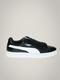

In [87]:
Image('1543.jpg')

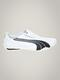

In [79]:
Image(filenames[indices[0][1]])

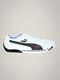

In [69]:
Image(filenames[indices[0][2]])

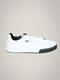

In [70]:
Image(filenames[indices[0][3]])

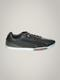

In [90]:
Image(filenames[indices[0][4]])

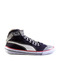

In [72]:
Image(filenames[indices[0][5]])

In [91]:
Image(filenames[indices[0][55]])

IndexError: index 55 is out of bounds for axis 0 with size 6